In [2]:
import numpy as np 
import cv2
import os

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
from pylab import rcParams
rcParams['figure.figsize'] = 15,15


In [4]:
import imageio
from collections import deque

In [ ]:
from Sport_Camera_Modules import *

In this notebook, I had a look at the distributions of the pixels in the video in different colorschemes. I also performed some basic processing as a first step for object recognition. 

In [5]:
def get_frame(ind): 
    vid_path = r'C:\Users\Darya\Downloads\%s.mp4'%ind
    vid = imageio.get_reader(vid_path,  'ffmpeg')
    image = vid.get_data(0)
    return image

In [6]:
image = get_frame(0)

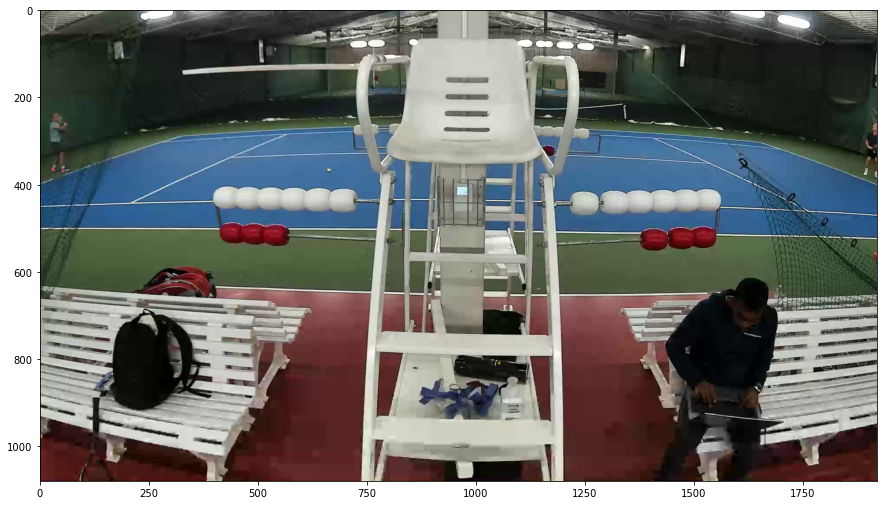

In [7]:
plt.imshow(image)

### RGB pixel distribution 

In [12]:
r, g, b = cv2.split(image)

In [13]:
def get_pixel_colors(image):
    pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    return pixel_colors

In [14]:
def scatter3d(img, labels, pixel_colors):
    val1, val2, val3 = cv2.split(img)
    ax = plt.axes(projection ="3d")
    ax.scatter3D(val1.flatten(), val2.flatten(), val3.flatten(), facecolors=pixel_colors)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    plt.show()

In [15]:
pixel_colors = get_pixel_colors(image)

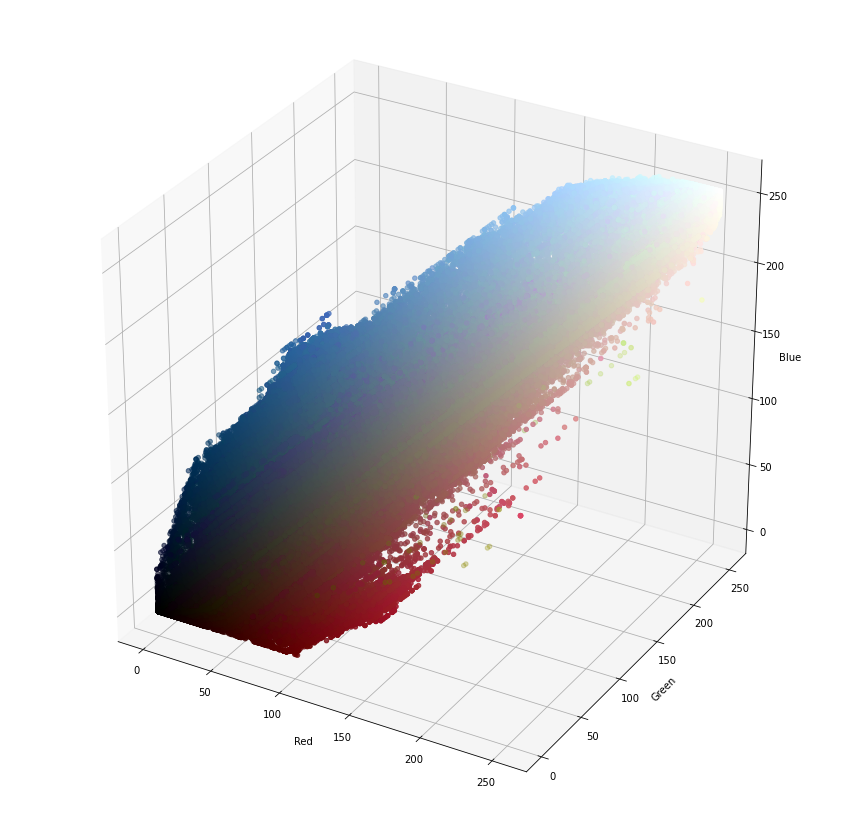

In [34]:
scatter3d(image, ["Red", "Green", "Blue"], pixel_colors)

### HSV pixel distribution 

In [42]:
hsv_img = hsv(image)

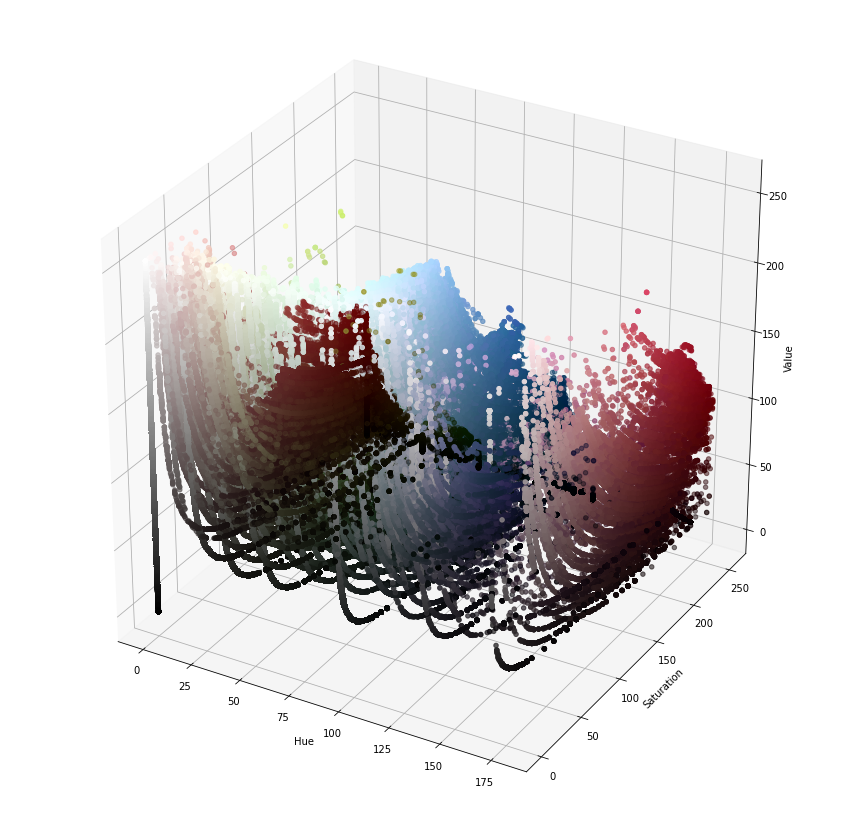

In [37]:
scatter3d(hsv_img, ["Hue", "Saturation", "Value"], pixel_colors)

### HLS pixel distribution 

In [43]:
hls_image = hls(image) 

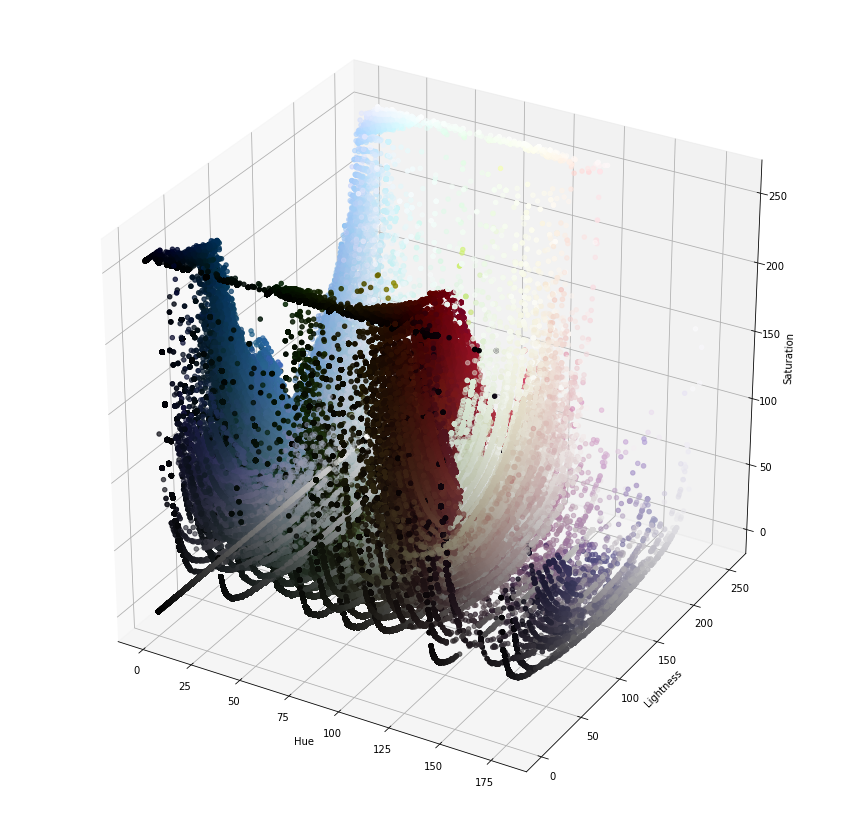

In [39]:
scatter3d(hls_image, ["Hue", "Lightness", "Saturation"], pixel_colors)

In [55]:
light_red = [250, 250, 160]
dark_red = [250, 250, 100]

In [56]:
lo_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255.0

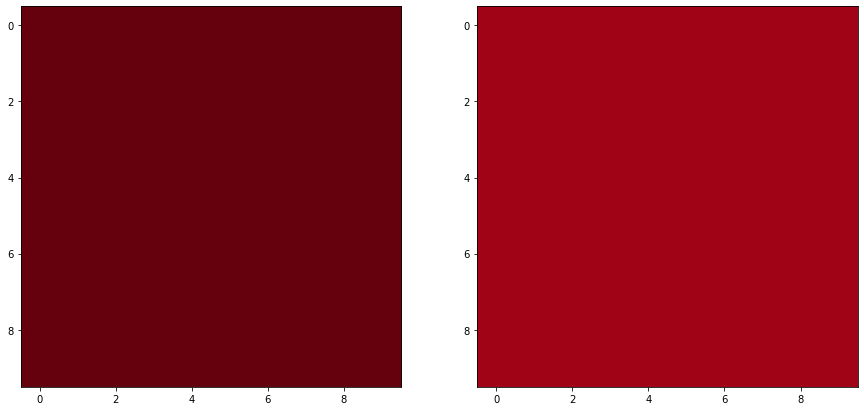

In [57]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

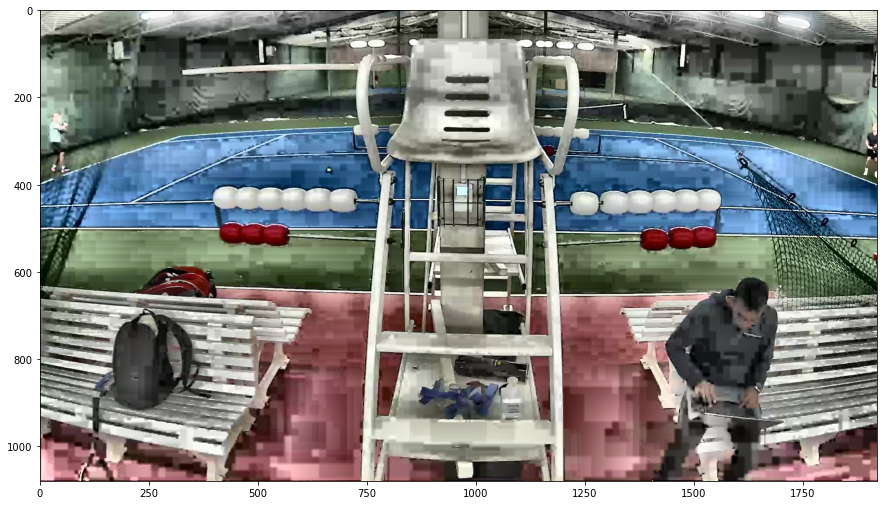

In [13]:
plt.imshow(contrast(image))

In [14]:
# lower_red = np.array([30,180,50])
# upper_red = np.array([255,255,180])

lower_red = np.array([120,180,50])
upper_red = np.array([255,255,180])

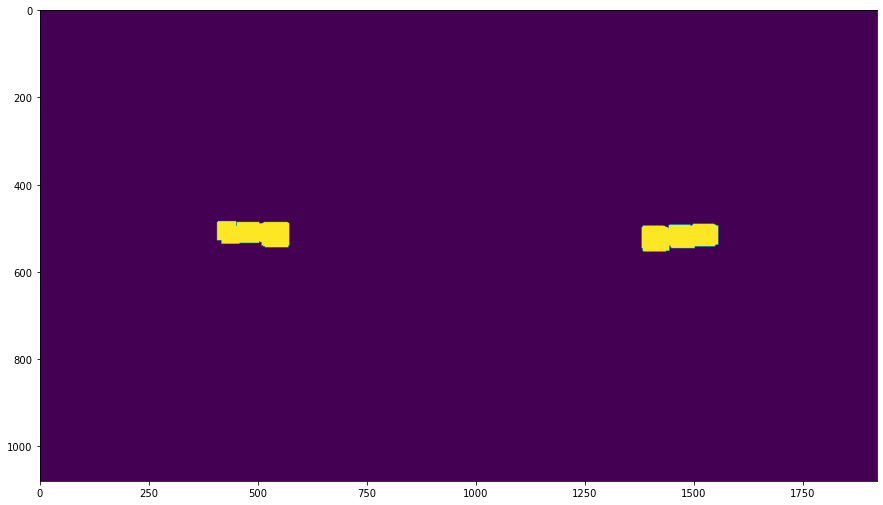

In [15]:
#contr = contrast(image)
hsv_contr = hsv(image) 
mask_red = masking(hsv_contr, (3, 3), lower_red, upper_red, 10, 20)
plt.imshow(mask_red)

In [16]:
image_copy = image.copy()
image_copy = isolate(image_copy, mask_red)

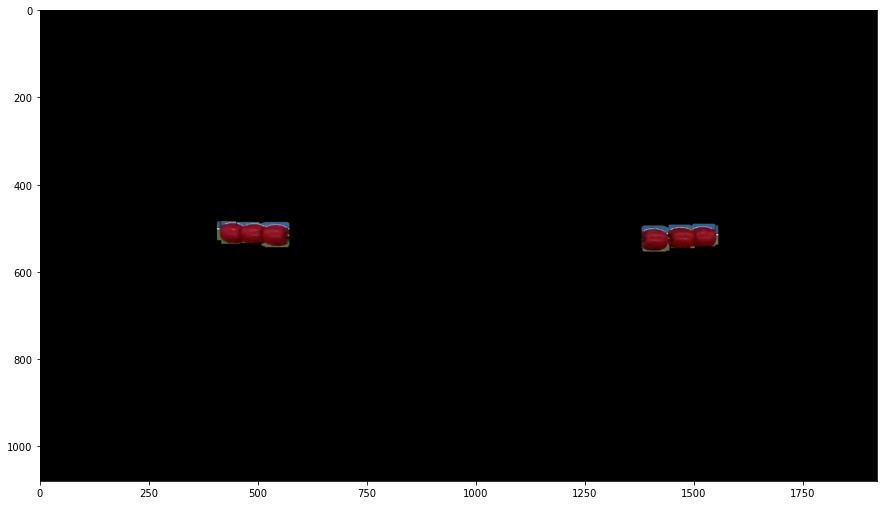

In [17]:
plt.imshow(image_copy)

In [18]:
mask_red_1 = masking(hsv(image_copy), (0, 0), lower_red, upper_red, 0, 0)

In [19]:
image_copy = isolate(image_copy, mask_red_1)

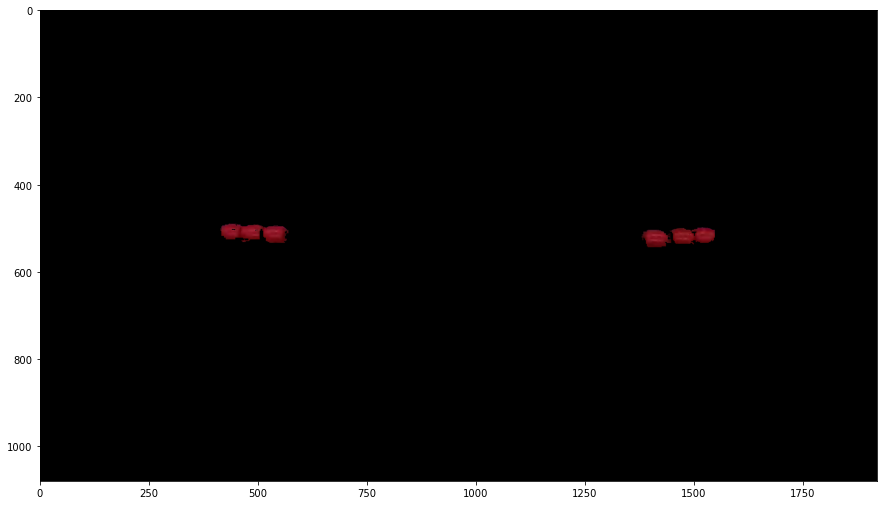

In [20]:
plt.imshow(image_copy)

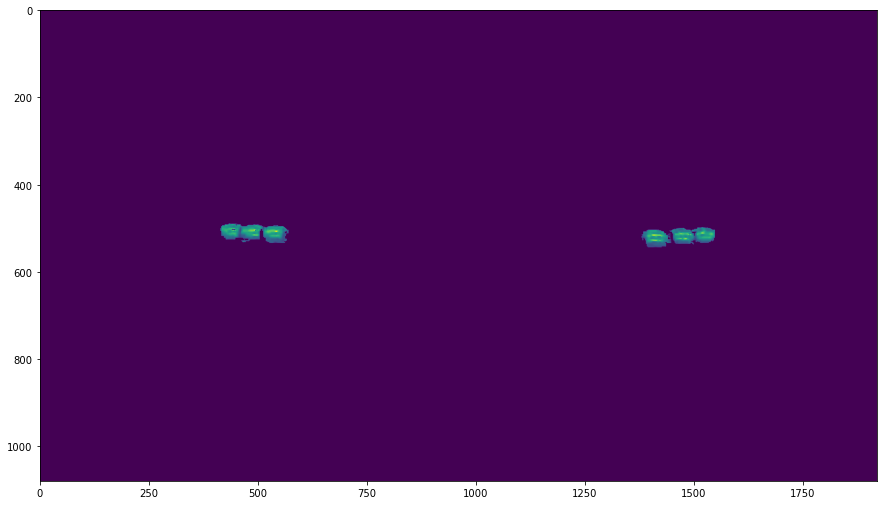

In [50]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)